In [7]:
import pandas as pd 
import numpy as np 
import re 
import matplotlib.pyplot as plt 
import statistics 

In [8]:
df = pd.read_csv('./archive/simplified_coffee.csv')
df.head(10)

,name,roaster,roast,loc_country,origin,100g_USD,rating,review_date,review
0,Ethiopia Shakiso Mormora,Revel Coffee,Medium-Light,United States,Ethiopia,4.70,92,November 2017,"Crisply sweet, cocoa-toned. Lemon blossom, roa..."
1,Ethiopia Suke Quto,Roast House,Medium-Light,United States,Ethiopia,4.19,92,November 2017,"Delicate, sweetly spice-toned. Pink peppercorn..."
2,Ethiopia Gedeb Halo Beriti,Big Creek Coffee Roasters,Medium,United States,Ethiopia,4.85,94,November 2017,"Deeply sweet, subtly pungent. Honey, pear, tan..."
3,Ethiopia Kayon Mountain,Red Rooster Coffee Roaster,Light,United States,Ethiopia,5.14,93,November 2017,"Delicate, richly and sweetly tart. Dried hibis..."
4,Ethiopia Gelgelu Natural Organic,Willoughby's Coffee & Tea,Medium-Light,United States,Ethiopia,3.97,93,November 2017,"High-toned, floral. Dried apricot, magnolia, a..."
5,Ethiopia Hambela Alaka,Black Oak Coffee Roasters,Medium-Light,United States,Ethiopia,5.14,93,November 2017,"Very delicate, sweetly savory. Lemon verbena, ..."
6,Organic Ethiopia Kirite,Wonderstate Coffee,Medium-Light,United States,Ethiopia,5.29,93,November 2017,"High-toned, crisply sweet. Lemon blossom, apri..."
7,Ethiopia Sidama,Reunion Island Coffee,Medium,Canada,Ethiopia,3.76,94,November 2017,"Balanced, sweet-savory. Red currant, roasted c..."
8,Decaf Ethiopia Sidamo,Old Soul Co.,Medium,United States,Ethiopia,5.73,90,November 2017,"Surprising and melodic, delicate yet vivid. Li..."
9,Ethiopia Yirgacheffe Washed G1,A.R.C.,Medium-Light,Hong Kong,Ethiopia,6.87,92,November 2017,"Delicate, gently tart, spice-toned. Pomegranat..."


In [9]:
def tokenize(text):
    """Returns a list of words that make up the text.
    
    Note: for simplicity, lowercase everything.
    Requirement: Use Regex to satisfy this function
    
    Params: {text: String}
    Returns: List
    """
    return re.findall('[a-z]+', text.lower())

In [10]:
def unique_tokens(reviews):
    '''
    Returns all unique tokens in the reviews in alphabetical order 
    '''
    tokens = set()
    for review in reviews:
        tokens.update(tokenize(review))
    return sorted(tokens)

In [11]:
review_words = unique_tokens(df['review'])

In [12]:
def create_word_occurrence_matrix(tokens, reviews):
    # print(tokens[35])
    word_occurrence_matrix = np.zeros(shape=(len(reviews), len(tokens)))
    word_count_by_review = {}
    for idx, review in enumerate(reviews):
        words = tokenize(review) 
        for word in words:
            if word_count_by_review.get(idx) is None:
                word_count_by_review[idx] = {}
            word_count_by_review[idx][word] = word_count_by_review[idx].get(word, 0) + 1
    for i in range(len(reviews)): 
        for j in range(len(tokens)):
          word = tokens[j]
          count = word_count_by_review[i].get(word)
          word_occurrence_matrix[i][j] = count if count is not None else 0
    return word_occurrence_matrix

In [13]:
def create_binary_word_occurrence_matrix(word_occurrence_matrix):
    binary_word_occurrence_matrix = np.zeros(shape=(len(word_occurrence_matrix), len(word_occurrence_matrix[0])))
    for i in range(len(word_occurrence_matrix)):
        for j in range(len(word_occurrence_matrix[0])):
            binary_word_occurrence_matrix[i][j] = 1 if word_occurrence_matrix[i][j] > 0 else 0 
    return binary_word_occurrence_matrix

In [14]:
word_occurrence_matrix = create_word_occurrence_matrix(review_words, df['review'])
binary_word_occurrence_matrix = create_binary_word_occurrence_matrix(word_occurrence_matrix)
document_frequencies = np.sum(binary_word_occurrence_matrix, axis=0)
document_frequencies
    

array([264.,   2.,   1., ...,   3., 308.,  11.])

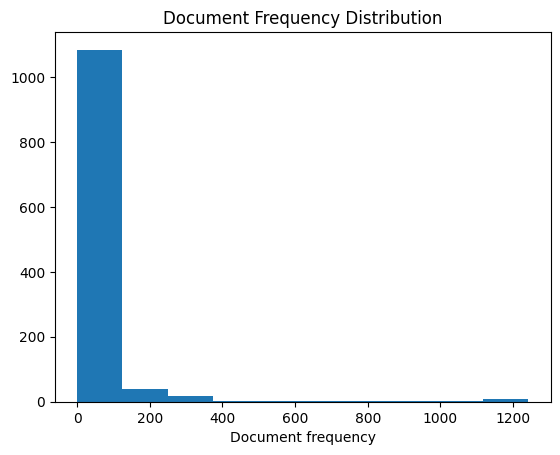

In [15]:
plt.hist(document_frequencies)
plt.title('Document Frequency Distribution')
plt.xlabel('Document frequency')
plt.show()

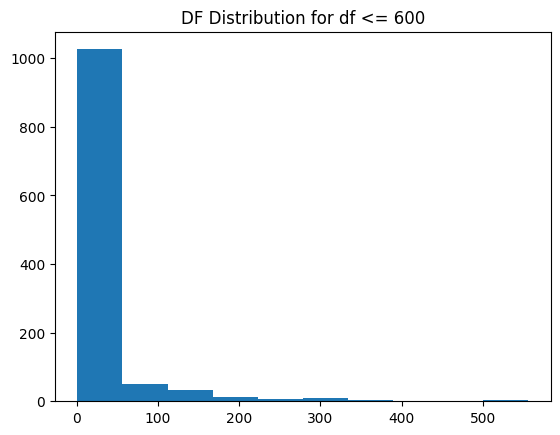

In [16]:
plt.hist(list(filter(lambda x: x <= 600, document_frequencies)))
plt.title('DF Distribution for df <= 600')
plt.show()

In [17]:
cooccurrence_matrix = np.matmul(binary_word_occurrence_matrix.T, binary_word_occurrence_matrix)
PMI = (cooccurrence_matrix / document_frequencies) / document_frequencies.reshape(document_frequencies.shape[0], 1)
exclude_word_idxs = []
for idx, freq in sorted(enumerate(document_frequencies), key=lambda x: x[1], reverse=True):
    # exclude these words from analysis since they appear too often 
    if freq < 600:
        break
    exclude_word_idxs.append(idx)
    print(review_words[idx])
    print(freq)
    print()
exclude_word_idxs.append(review_words.index('espresso'))
exclude_word_idxs.append(review_words.index('evaluated'))
exclude_word_idxs.append(review_words.index('as'))


and
1242.0

in
1238.0

aroma
1232.0

cup
1232.0

finish
1230.0

mouthfeel
1218.0

with
1126.0

structure
1051.0

sweet
1049.0

acidity
1023.0

toned
884.0

the
788.0

of
744.0

notes
671.0



In [18]:
# !!!!!! I think this looks pretty reasonable 
word_idx = review_words.index('nut')
for idx, pmi in sorted(enumerate(PMI[word_idx]), key=lambda x: x[1], reverse=True)[:1000]:
    if cooccurrence_matrix[word_idx][idx] > 5 and idx not in exclude_word_idxs:
        print(f'{review_words[idx]} -- {pmi} -- {cooccurrence_matrix[word_idx][idx]}')
    

nut -- 0.010101010101010102 -- 99.0
macadamia -- 0.009506833036244802 -- 16.0
baking -- 0.0021265284423179157 -- 28.0
brisk -- 0.001994466962619829 -- 31.0
magnolia -- 0.001984126984126984 -- 22.0
butter -- 0.0018792576932111817 -- 24.0
hazelnut -- 0.0018585858585858585 -- 23.0
three -- 0.0018214936247723133 -- 11.0
velvety -- 0.0017566974088713218 -- 24.0
parts -- 0.001736111111111111 -- 11.0
date -- 0.0017217630853994489 -- 15.0
brittle -- 0.0016835016835016834 -- 9.0
plum -- 0.0016339869281045752 -- 11.0
small -- 0.0015205821657434562 -- 14.0
fir -- 0.0015151515151515152 -- 9.0
quietly -- 0.0015151515151515152 -- 6.0
round -- 0.0014903129657228018 -- 18.0
cashew -- 0.001443001443001443 -- 8.0
milk -- 0.0014001400140014003 -- 14.0
caramel -- 0.0013986013986013986 -- 9.0
quiet -- 0.0013932427725531174 -- 8.0
gently -- 0.001388888888888889 -- 22.0
almond -- 0.0013628346961680295 -- 34.0
lightly -- 0.0013468013468013469 -- 10.0
molasses -- 0.0012894906511927786 -- 6.0
drying -- 0.001236

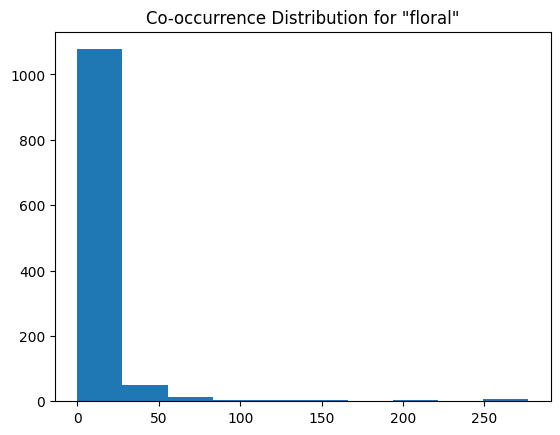

In [19]:
# for words that don't have too high document frequency:
# distribution of co-occurence with other words 
def show_cooccurrence_distribution(word):  
  word_idx = review_words.index(word)
  plt.hist(cooccurrence_matrix[word_idx])
  plt.title(f'Co-occurrence Distribution for "{word}"')
  plt.show()
show_cooccurrence_distribution('floral')

In [20]:
def print_similar_descriptors(word, floor=20):
    word_idx = review_words.index(word)
    for idx, cooccurrence in sorted(enumerate(cooccurrence_matrix[word_idx]), key=lambda x: x[1], reverse=True)[:100]:
        word = review_words[idx]
        if idx not in exclude_word_idxs:
            print(f'{word} -- {cooccurrence}')
print_similar_descriptors('floral', floor=40)

floral -- 277.0
tart -- 129.0
richly -- 124.0
chocolate -- 112.0
syrupy -- 112.0
cocoa -- 110.0
juicy -- 92.0
nib -- 88.0
sweetly -- 88.0
zest -- 82.0
bright -- 80.0
long -- 77.0
fruit -- 74.0
smooth -- 73.0
almond -- 67.0
dark -- 66.0
crisp -- 64.0
deeply -- 64.0
satiny -- 62.0
a -- 59.0
flavor -- 57.0
full -- 55.0
balanced -- 54.0
rich -- 53.0
cedar -- 51.0
resonant -- 50.0
sandalwood -- 50.0
crisply -- 48.0
jasmine -- 48.0
plush -- 47.0
around -- 45.0
silky -- 44.0
milk -- 43.0
savory -- 43.0
small -- 42.0
to -- 42.0
like -- 41.0
syrup -- 41.0
very -- 41.0
by -- 40.0
high -- 40.0
chocolaty -- 39.0
delicate -- 39.0
narcissus -- 39.0
saturated -- 39.0
flowers -- 38.0
vibrant -- 38.0
centers -- 37.0
lemon -- 37.0
delicately -- 36.0
undertones -- 35.0
apricot -- 34.0
honeysuckle -- 34.0
leads -- 33.0
aromatic -- 32.0
lilac -- 32.0
tangerine -- 32.0
gently -- 31.0
is -- 31.0
deep -- 30.0
fresh -- 30.0
hint -- 30.0
parts -- 30.0
pink -- 30.0
consolidates -- 29.0
lively -- 29.0
three -- 29

In [21]:
cooccurrence_matrix

array([[264.,   2.,   1., ...,   1.,  65.,   5.],
       [  2.,   2.,   0., ...,   0.,   0.,   0.],
       [  1.,   0.,   1., ...,   0.,   0.,   0.],
       ...,
       [  1.,   0.,   0., ...,   3.,   0.,   0.],
       [ 65.,   0.,   0., ...,   0., 308.,   6.],
       [  5.,   0.,   0., ...,   0.,   6.,  11.]])

In [22]:
# plt.figure(figsize=(5, 5))
# plt.imshow(cooccurrence_matrix, interpolation='none', cmap=plt.cm.Blues, vmin=0, vmax=1.0)
# plt.colorbar()

# plt.xticks(range(len(review_words)), review_words, rotation=90)
# plt.yticks(range(len(review_words)), review_words)
plt.show()